## Predict Carbon Emissions Based on Satellite Observations

* This is a time series satellite observations dataset extracted from Sentinel-5P satelite from 2019 to 2021.

* The objective is to build a regression model that accurately predicts the amount of carbon emissions in the next years.

In [3]:
import pandas as pd
import gdown
import kagglehub
import os

In [4]:
path = kagglehub.dataset_download("mohammad2012191/q3-data")

print("Path to dataset files:", path)

100%|██████████████████████████████████████| 37.6M/37.6M [00:04<00:00, 8.64MB/s]

Extracting model files...


Path to dataset files: /Users/razan./.cache/kagglehub/datasets/mohammad2012191/q3-data/versions/1


In [5]:
csv_path = os.path.join(path, "train.csv")

data = pd.read_csv(csv_path)
data.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


# EDA & Preprocessing

1. Drop the ID feature (ID_LAT_LON_YEAR_WEEK):

In [6]:
# 1. TODO
data = data.drop(columns=["ID_LAT_LON_YEAR_WEEK"])
data

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,-3.299,30.301,2021,50,NaN,NaN,NaN,NaN,NaN,NaN,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


2. Check for the missing values and handle them.


In [7]:
# 2. TODO
missingValues = data.isnull().sum()
print(missingValues)
data = data.dropna()
data

latitude                                        0
longitude                                       0
year                                            0
week_no                                         0
SulphurDioxide_SO2_column_number_density    14609
                                            ...  
Cloud_sensor_azimuth_angle                    484
Cloud_sensor_zenith_angle                     484
Cloud_solar_azimuth_angle                     484
Cloud_solar_zenith_angle                      484
emission                                        0
Length: 75, dtype: int64


,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
155,-0.510,29.290,2021,49,0.000024,0.895098,0.000040,0.073222,-42.108062,26.770401,...,5019.467594,66195.733910,4045.293055,29.389584,0.267237,-64.947208,44.180872,-131.574370,35.591652,4.687898
451,-0.547,29.653,2021,27,0.000084,0.724555,0.000090,0.158538,4.135166,36.405689,...,3786.135092,73589.759158,3008.477774,13.889302,0.167235,-12.612077,37.755641,-39.070211,31.531712,0.637903
453,-0.547,29.653,2021,29,-0.000065,0.692398,-0.000034,0.097820,4.431898,39.623330,...,3227.241991,77346.158934,2227.241986,9.526436,0.174665,-42.409148,48.340040,-41.646779,30.232400,0.627023
474,-0.547,29.653,2021,50,-0.000215,0.738936,-0.000155,0.079641,74.048912,38.304690,...,6069.286554,56446.041636,5069.286504,6.718726,0.221424,26.161072,35.887857,-138.458953,31.743673,0.618269
1112,-0.615,30.885,2021,52,0.000195,0.816164,0.000159,0.041291,74.313675,37.566437,...,4901.979810,65507.318464,3901.979885,18.925466,0.252066,-11.962600,41.940240,-137.305986,32.674957,84.161446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78045,-3.136,30.364,2021,29,-0.000041,0.560384,-0.000017,0.028559,4.671381,39.879721,...,3276.807608,75745.985749,2397.274872,6.929006,0.189645,-30.680727,53.829194,-38.467197,32.124882,15.915551
78203,-3.138,30.662,2021,28,-0.000296,0.582466,-0.000162,0.083189,74.629140,34.996964,...,4787.405410,66259.879395,3789.424594,6.820494,0.179993,-41.721972,36.694905,-41.679800,33.989014,22.860306
78205,-3.138,30.662,2021,30,-0.000177,0.636178,-0.000094,0.085995,-50.365193,38.049683,...,3448.748725,74489.621613,2596.923233,5.897749,0.177577,-13.445917,47.642659,-38.895209,29.898948,22.815990
78216,-3.138,30.662,2021,41,0.000056,0.694221,0.000039,0.000000,75.047003,30.692394,...,6428.729028,54486.457256,5428.729056,9.640017,0.233593,-13.485498,43.845330,-102.903782,25.609043,25.353760


3. Plot the "emission" histogram.

array([[<Axes: title={'center': 'emission'}>]], dtype=object)

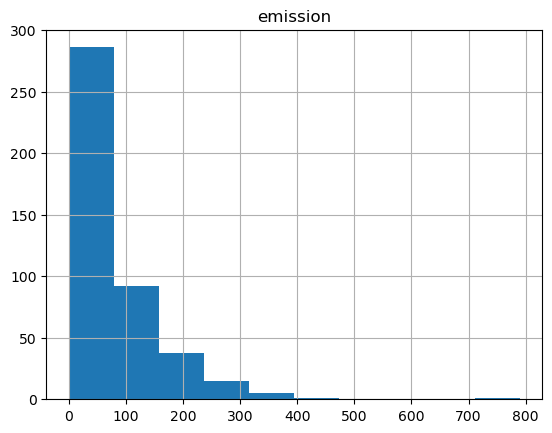

In [8]:
# 3. TODO
data.hist(column="emission")

4. Plot the "latitude" and "longitude" using a scatter plot then colorize the points using the "emission" column.

<Axes: xlabel='latitude', ylabel='longitude'>

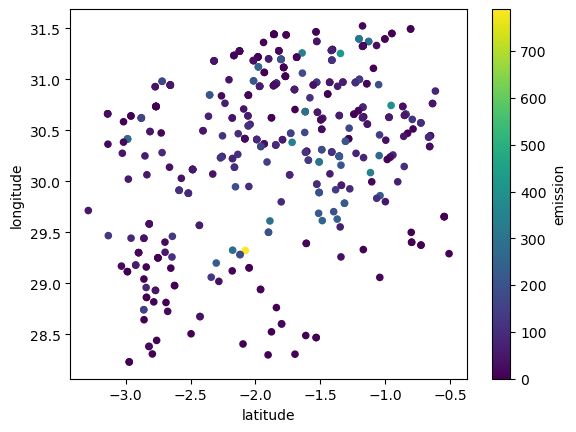

In [9]:
# 4. TODO
data.plot.scatter(x='latitude',
                      y='longitude',
                      c='emission',
                      colormap='viridis')

# Feature engineering

1. Add a new feature representing "Location" (To do that, you should convert "longitude" and "latitude" features to string type, concatenate them and add the result as a new feature).

In [10]:
# 1. TODO
data["longitude"] = data["longitude"].astype(str)
data["latitude"] = data["latitude"].astype(str)
data["Location"] = data["longitude"] + data["latitude"]
data.head()

/var/folders/4s/07xm7wlj5_774jmjtngprb4c0000gn/T/ipykernel_39764/905605825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["longitude"] = data["longitude"].astype(str)
/var/folders/4s/07xm7wlj5_774jmjtngprb4c0000gn/T/ipykernel_39764/905605825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["latitude"] = data["latitude"].astype(str)
/var/folders/4s/07xm7wlj5_774jmjtngprb4c0000gn/T/ipykernel_39764/905605825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,Location
155,-0.51,29.29,2021,49,0.000024,0.895098,0.000040,0.073222,-42.108062,26.770401,...,66195.733910,4045.293055,29.389584,0.267237,-64.947208,44.180872,-131.574370,35.591652,4.687898,29.29-0.51
451,-0.547,29.653,2021,27,0.000084,0.724555,0.000090,0.158538,4.135166,36.405689,...,73589.759158,3008.477774,13.889302,0.167235,-12.612077,37.755641,-39.070211,31.531712,0.637903,29.653-0.547
453,-0.547,29.653,2021,29,-0.000065,0.692398,-0.000034,0.097820,4.431898,39.623330,...,77346.158934,2227.241986,9.526436,0.174665,-42.409148,48.340040,-41.646779,30.232400,0.627023,29.653-0.547
474,-0.547,29.653,2021,50,-0.000215,0.738936,-0.000155,0.079641,74.048912,38.304690,...,56446.041636,5069.286504,6.718726,0.221424,26.161072,35.887857,-138.458953,31.743673,0.618269,29.653-0.547
1112,-0.615,30.885,2021,52,0.000195,0.816164,0.000159,0.041291,74.313675,37.566437,...,65507.318464,3901.979885,18.925466,0.252066,-11.962600,41.940240,-137.305986,32.674957,84.161446,30.885-0.615


2. Add one aggregation feature representing the average emissions per location (You should groupby "Location" feature and take mean of the "emission", then merge the result to the data)

In [11]:
# 2. TODO
average_emissions_per_location = data.groupby("Location").agg({'emission': ['mean']})
average_emissions_per_location.columns = ['average emissions per location']
average_emissions_per_location.reset_index(inplace=True)
data = data.merge(average_emissions_per_location, on="Location")
data.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,Location,average emissions per location
0,-0.51,29.29,2021,49,0.000024,0.895098,0.000040,0.073222,-42.108062,26.770401,...,4045.293055,29.389584,0.267237,-64.947208,44.180872,-131.574370,35.591652,4.687898,29.29-0.51,4.687898
1,-0.547,29.653,2021,27,0.000084,0.724555,0.000090,0.158538,4.135166,36.405689,...,3008.477774,13.889302,0.167235,-12.612077,37.755641,-39.070211,31.531712,0.637903,29.653-0.547,0.627731
2,-0.547,29.653,2021,29,-0.000065,0.692398,-0.000034,0.097820,4.431898,39.623330,...,2227.241986,9.526436,0.174665,-42.409148,48.340040,-41.646779,30.232400,0.627023,29.653-0.547,0.627731
3,-0.547,29.653,2021,50,-0.000215,0.738936,-0.000155,0.079641,74.048912,38.304690,...,5069.286504,6.718726,0.221424,26.161072,35.887857,-138.458953,31.743673,0.618269,29.653-0.547,0.627731
4,-0.615,30.885,2021,52,0.000195,0.816164,0.000159,0.041291,74.313675,37.566437,...,3901.979885,18.925466,0.252066,-11.962600,41.940240,-137.305986,32.674957,84.161446,30.885-0.615,84.161446


3. Use Label encoder to encode all the categorical features

In [13]:
# 3. TODO
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Location"] = le.fit_transform(data["Location"])
data.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,Location,average emissions per location
0,-0.51,29.29,2021,49,0.000024,0.895098,0.000040,0.073222,-42.108062,26.770401,...,4045.293055,29.389584,0.267237,-64.947208,44.180872,-131.574370,35.591652,4.687898,40,4.687898
1,-0.547,29.653,2021,27,0.000084,0.724555,0.000090,0.158538,4.135166,36.405689,...,3008.477774,13.889302,0.167235,-12.612077,37.755641,-39.070211,31.531712,0.637903,62,0.627731
2,-0.547,29.653,2021,29,-0.000065,0.692398,-0.000034,0.097820,4.431898,39.623330,...,2227.241986,9.526436,0.174665,-42.409148,48.340040,-41.646779,30.232400,0.627023,62,0.627731
3,-0.547,29.653,2021,50,-0.000215,0.738936,-0.000155,0.079641,74.048912,38.304690,...,5069.286504,6.718726,0.221424,26.161072,35.887857,-138.458953,31.743673,0.618269,62,0.627731
4,-0.615,30.885,2021,52,0.000195,0.816164,0.000159,0.041291,74.313675,37.566437,...,3901.979885,18.925466,0.252066,-11.962600,41.940240,-137.305986,32.674957,84.161446,182,84.161446


# Modeling

### Baseline:

1. Create a baseline using the "emission" median and calculate MAE score.

In [20]:
# 1. TODO
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

X = data.drop("emission", axis=1)
y = data["emission"]

baseline = np.full_like(y, y.median())
mae = mean_absolute_error(y, baseline)
print(f"MAE: {mae:.4f}")

MAE: 57.5299


In [16]:
print(f"Missing values in y_train: {y_train.isna().sum()}")
print(f"Missing values in y_valid: {y_valid.isna().sum()}")

Missing values in y_train: 0
Missing values in y_valid: 0


In [18]:
print("Unique years in dataset:", data["year"].unique())
print("Count of each year:\n", data["year"].value_counts())

Unique years in dataset: [2021]
Count of each year:
 year
2021    438
Name: count, dtype: int64


2. Perform a Time-Based Train-Test Split:
  * You will use the "year" column to split data manually using pandas.
  * Use all samples from 2019 and 2020 as the training set.
  * Use all samples from 2021 as the validation set.
  * Construct X_train, X_valid, y_train, y_valid

In [53]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()
# cols = data.columns.drop("emission")
# data[cols] = scaler.fit_transform(data[cols])
# data.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission,Location,average emissions per location_x,average emissions per location_y,average emissions per location
0,1.000000,0.322209,0.0,0.88,0.370987,0.524663,0.476757,0.257009,0.289238,0.377793,...,0.726622,0.200826,0.619988,0.071964,0.943074,0.005936,0.168067,0.005936,0.005936,0.005936
1,0.986676,0.432342,0.0,0.00,0.403289,0.297847,0.519687,0.556466,0.510957,0.530519,...,0.408350,0.498670,0.500583,0.860123,0.691948,0.000808,0.260504,0.000795,0.000795,0.000795
2,0.986676,0.432342,0.0,0.08,0.322999,0.255079,0.413251,0.343344,0.512379,0.581521,...,0.431996,0.329092,0.697280,0.838170,0.611579,0.000794,0.260504,0.000795,0.000795,0.000795
3,0.986676,0.432342,0.0,0.92,0.242232,0.316972,0.309130,0.279539,0.846167,0.560620,...,0.580816,0.719331,0.465873,0.013305,0.705058,0.000783,0.260504,0.000795,0.000795,0.000795
4,0.962189,0.806129,0.0,1.00,0.463405,0.419684,0.579316,0.144929,0.847436,0.548918,...,0.678339,0.502366,0.578348,0.023129,0.762663,0.106571,0.764706,0.106571,0.106571,0.106571


In [26]:
# Train set: Use data from 2019 & 2020
train_mask = (data["year"] >= 2019) & (data["year"] <= 2020)
X_train = data[train_mask].drop(columns=["emission"])
y_train = data[train_mask]["emission"]

# Validation set: Use data from 2021
valid_mask = (data["year"] == 2021)
X_valid = data[valid_mask].drop(columns=["emission"])
y_valid = data[valid_mask]["emission"]

# Verify split sizes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_valid shape: {X_valid.shape}, y_valid shape: {y_valid.shape}")

Unique years in dataset: [2021]
X_train shape: (0, 76), y_train shape: (0,)
X_valid shape: (438, 76), y_valid shape: (438,)


3. Train a LGBMRegressor on the training data.

In [24]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/f2/75/cffc9962cca296bc5536896b7e65b4a7cdeb8db208e71b9c0133c08f8f7e/lightgbm-4.6.0-py3-none-macosx_10_15_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 4.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
# 3. TODO
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# Ensure training data is available
if len(X_train) == 0:
    raise ValueError("⚠️ X_train is empty! Ensure data contains 2019 & 2020 records.")

# Define LGBMRegressor model
model = lgb.LGBMRegressor(
    n_estimators=1000,  # Number of boosting rounds
    learning_rate=0.05,  # Adjust learning rate
    num_leaves=31,  # Control complexity
    random_state=42
)

# Train the model
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="mae",
    early_stopping_rounds=50,
    verbose=100
)

# Make predictions
y_pred = model.predict(X_valid)

# Evaluate the model
mae = mean_absolute_error(y_valid, y_pred)
print(f"LGBMRegressor MAE: {mae:.4f}")

ValueError: ⚠️ X_train is empty! Ensure data contains 2019 & 2020 records.

In [58]:
# 3. TODO
from lightgbm import LGBMRegressor
model2 = LGBMRegressor()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_valid)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10924
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 77
[LightGBM] [Info] Start training from score 0.092206
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

ValueError: Input data must be 2 dimensional and non empty.

4. Evaluate the Model on the validation data Using MAE

In [ ]:
# 4. TODO
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)

5. Plot the features importance of your model.

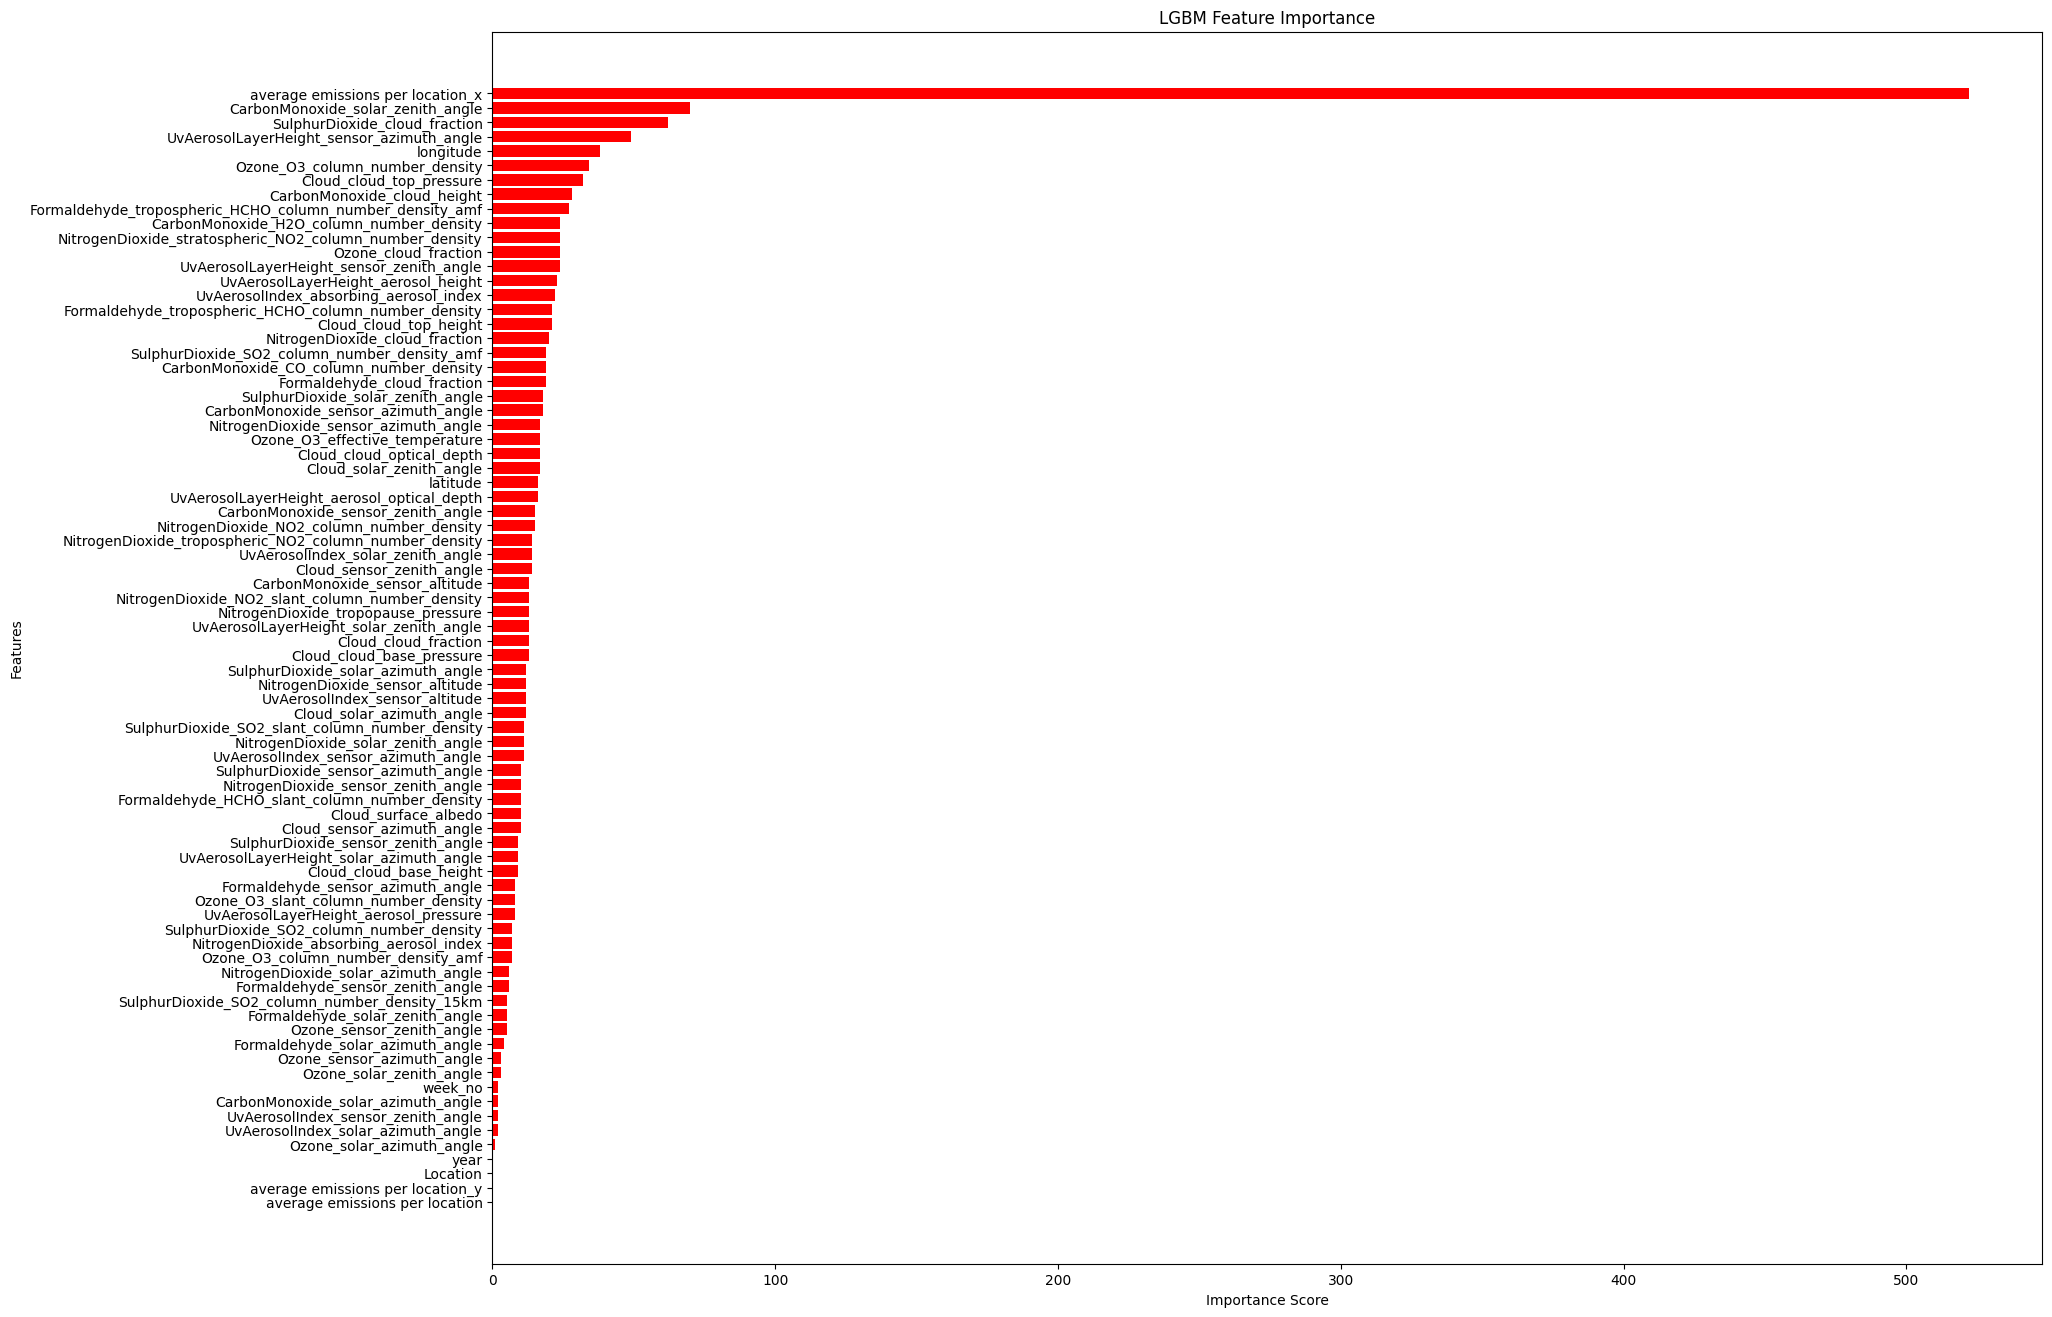

In [62]:
# 5. TODO
import matplotlib.pyplot as plt

LGBM_importance = list(zip(X.columns, model2.feature_importances_))
sorted_catboost_importance = sorted(LGBM_importance, key=lambda x: x[1], reverse=True)

# Extract features and their importances
features, importances = zip(*sorted_catboost_importance)

# Plot feature importances
plt.figure(figsize=(20, 16))
plt.barh(features, importances, color='red')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('LGBM Feature Importance')
plt.gca().invert_yaxis()
plt.show()

6. Plot the validation predictions using a histogram.

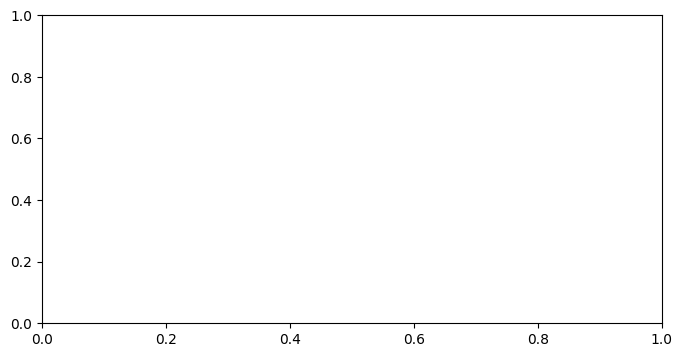

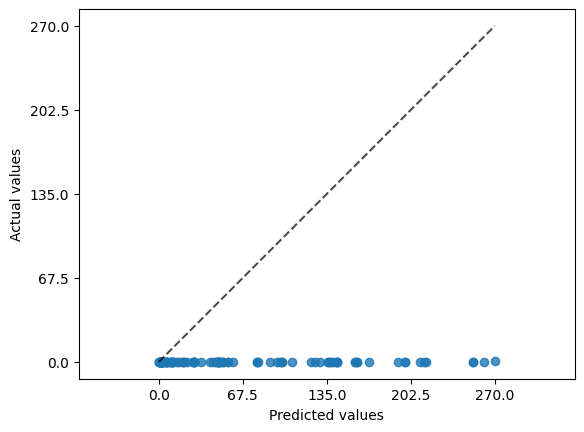

In [71]:
# 6. TODO
from sklearn.metrics import PredictionErrorDisplay
plt.subplots(figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
)